In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Load data
df = pd.read_csv('../data/raw/marketing_data.csv')
df['week'] = pd.to_datetime(df['week'])
df.set_index('week', inplace=True)

# Display basic info
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (104, 11)

Data types:
facebook_spend      float64
google_spend        float64
tiktok_spend        float64
instagram_spend     float64
snapchat_spend      float64
social_followers      int64
average_price       float64
promotions            int64
emails_send           int64
sms_send              int64
revenue             float64
dtype: object

First 5 rows:


,facebook_spend,google_spend,tiktok_spend,instagram_spend,snapchat_spend,social_followers,average_price,promotions,emails_send,sms_send,revenue
week,,,,,,,,,,,
2023-09-17,6030.80,3130.14,2993.22,1841.08,2204.72,0,101.95,0,102684,20098,83124.16
2023-09-24,5241.44,2704.00,0.00,0.00,0.00,0,103.86,0,96573,29920,373.02
2023-10-01,5893.00,0.00,0.00,0.00,0.00,0,100.38,0,96797,22304,513.01
2023-10-08,7167.16,0.00,0.00,0.00,0.00,0,103.14,1,99098,14171,452.78
2023-10-15,5360.29,0.00,0.00,3237.15,0.00,0,107.76,1,120754,30207,41441.95


In [2]:
# Summary statistics
df.describe()

,facebook_spend,google_spend,tiktok_spend,instagram_spend,snapchat_spend,social_followers,average_price,promotions,emails_send,sms_send,revenue
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,5346.302500,1543.866442,955.632212,1019.342885,747.465000,72414.509615,99.962500,0.211538,120691.067308,23623.115385,49053.945096
std,1168.961177,1863.350279,1376.993132,1349.184250,982.088273,47778.448985,6.496186,0.410377,25158.181476,6661.362493,93329.607019
min,2456.940000,0.000000,0.000000,0.000000,0.000000,0.000000,87.560000,0.000000,68655.000000,10460.000000,1.000000
25%,4538.977500,0.000000,0.000000,0.000000,0.000000,38318.250000,94.207500,0.000000,102971.500000,19252.500000,474.852500
50%,5293.780000,0.000000,0.000000,0.000000,0.000000,81109.500000,99.490000,0.000000,120237.000000,22459.500000,972.065000
75%,6033.325000,3374.205000,2487.172500,2395.350000,1705.872500,110281.250000,105.395000,0.000000,136594.000000,28107.000000,45773.732500
max,9325.180000,6083.160000,4143.250000,3877.990000,3126.040000,143477.000000,113.380000,1.000000,185460.000000,40153.000000,398453.530000


In [3]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
facebook_spend      0
google_spend        0
tiktok_spend        0
instagram_spend     0
snapchat_spend      0
social_followers    0
average_price       0
promotions          0
emails_send         0
sms_send            0
revenue             0
dtype: int64


In [4]:
# Check for zeros in spend columns
spend_cols = ['facebook_spend', 'google_spend', 'tiktok_spend', 'instagram_spend', 'snapchat_spend']
for col in spend_cols:
    zero_count = (df[col] == 0).sum()
    print(f"Zeros in {col}: {zero_count} ({zero_count/len(df)*100:.2f}%)")

Zeros in facebook_spend: 0 (0.00%)
Zeros in google_spend: 59 (56.73%)
Zeros in tiktok_spend: 68 (65.38%)
Zeros in instagram_spend: 63 (60.58%)
Zeros in snapchat_spend: 63 (60.58%)


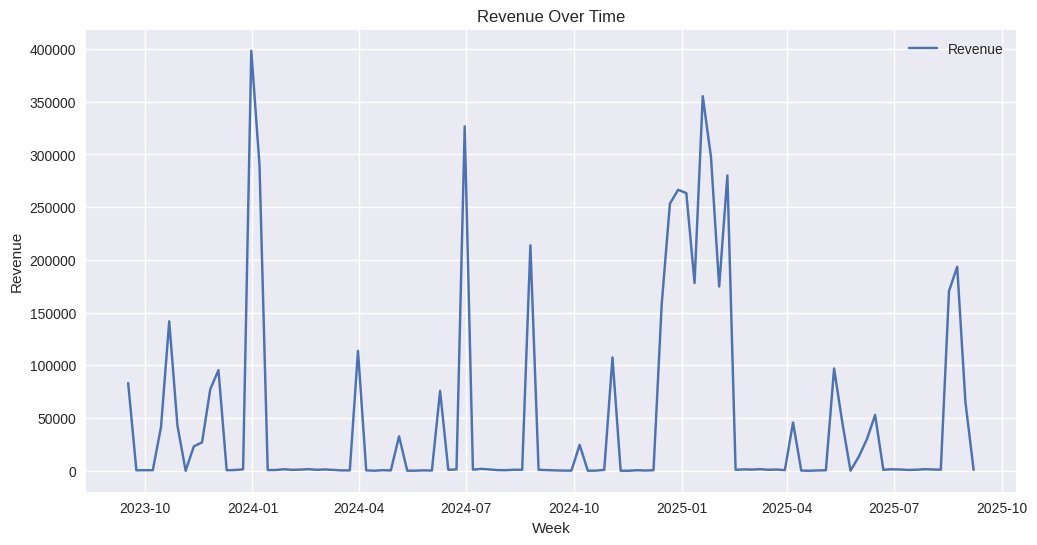

In [5]:
# Plot revenue over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['revenue'], label='Revenue')
plt.title('Revenue Over Time')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

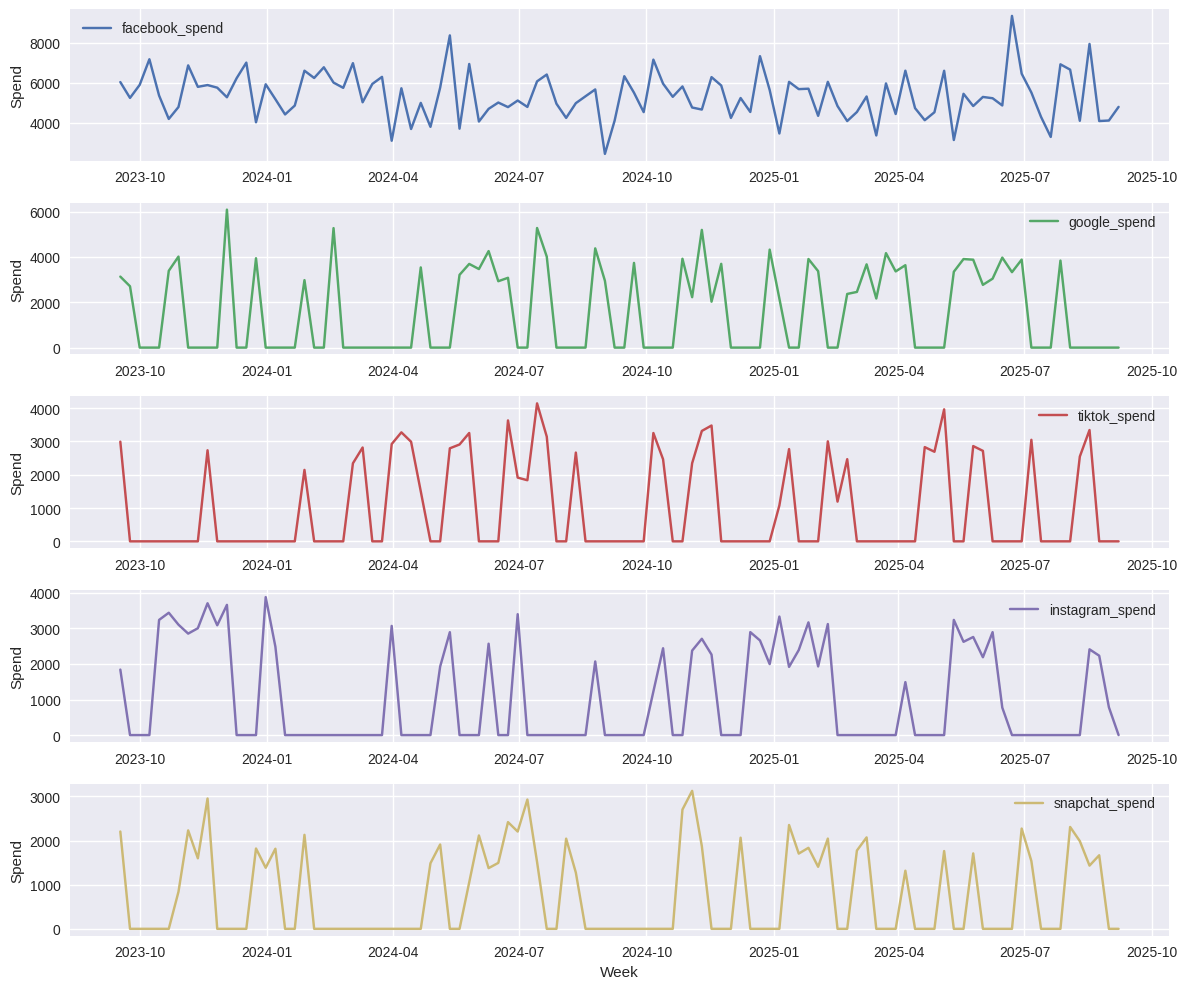

In [6]:
# Plot all media spends over time
fig, axes = plt.subplots(len(spend_cols), 1, figsize=(12, 10))
for i, col in enumerate(spend_cols):
    axes[i].plot(df.index, df[col], label=col, color='C'+str(i))
    axes[i].set_ylabel('Spend')
    axes[i].legend()
    axes[i].grid(True)
plt.xlabel('Week')
plt.tight_layout()
plt.show()

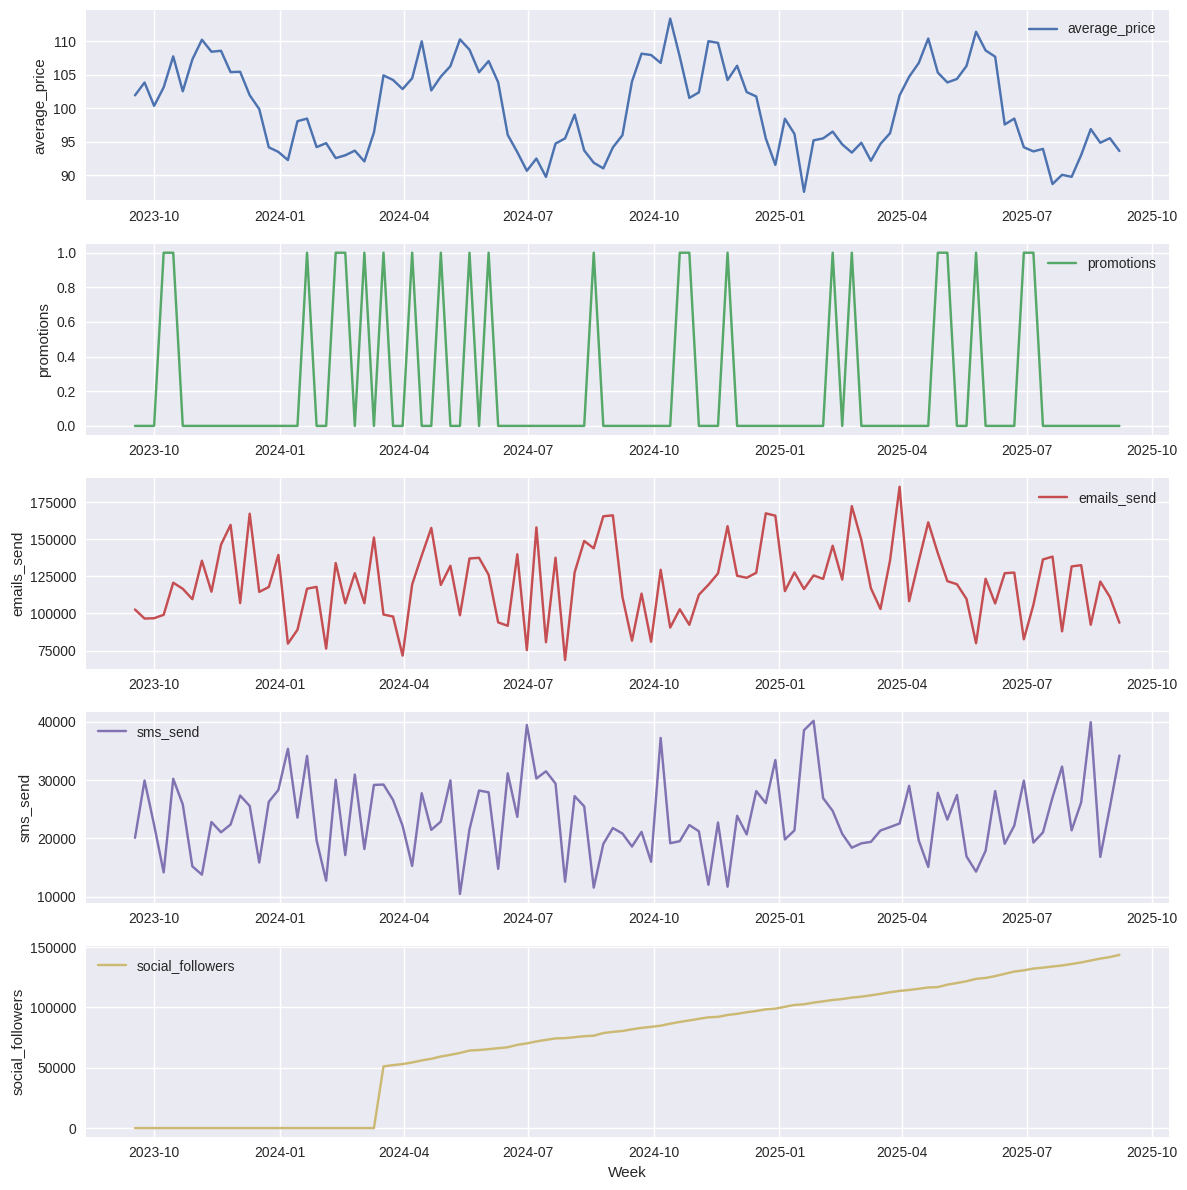

In [7]:
# Plot other variables: average_price, promotions, emails_send, sms_send
other_vars = ['average_price', 'promotions', 'emails_send', 'sms_send', 'social_followers']
fig, axes = plt.subplots(len(other_vars), 1, figsize=(12, 12))
for i, col in enumerate(other_vars):
    axes[i].plot(df.index, df[col], label=col, color='C'+str(i))
    axes[i].set_ylabel(col)
    axes[i].legend()
    axes[i].grid(True)
plt.xlabel('Week')
plt.tight_layout()
plt.show()

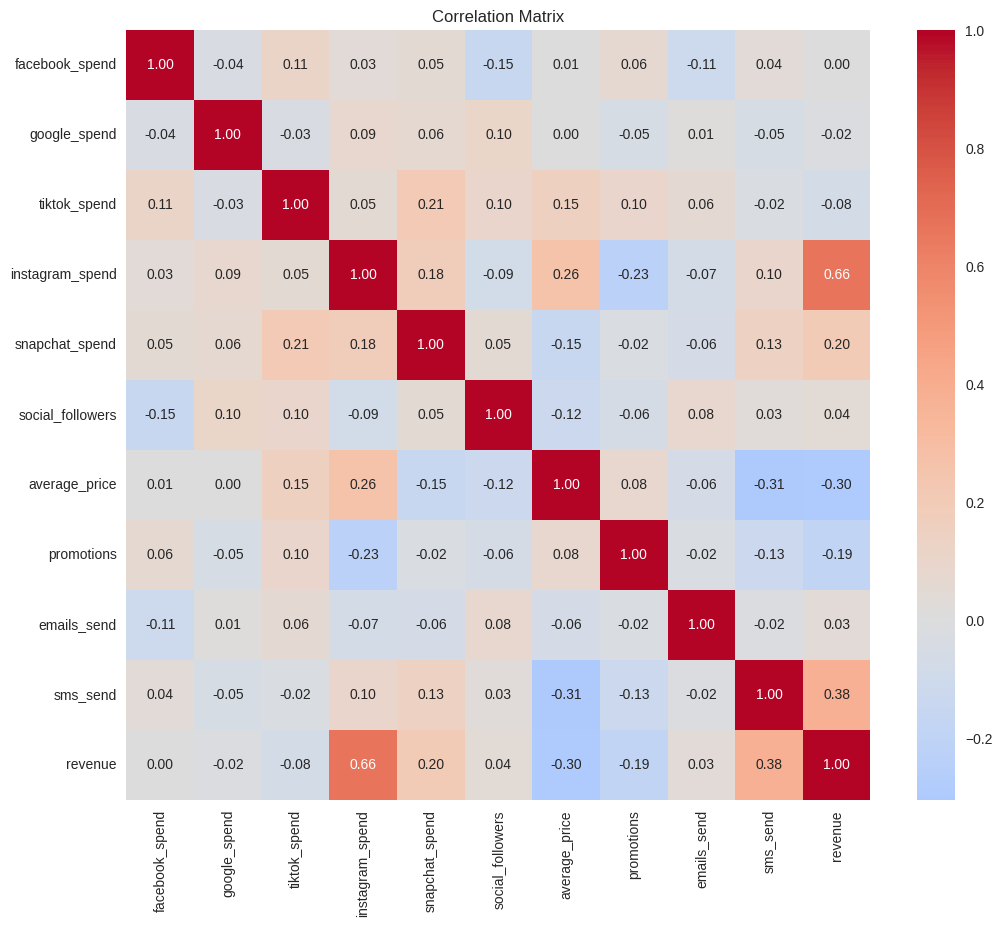

In [8]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()